In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# for jupyter
%matplotlib inline 

dt = pd.read_csv('Dataset/heart.csv')
"""
font: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
Attribute Information
    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl] // algumas referêcias apontam mg/dl
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]
"""      
print(dt.shape)
print(dt.info())
dt.head(100)

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0


In [206]:
db = pd.DataFrame()
db["ExerciseAngina"] = dt["ExerciseAngina"].apply(lambda x: 1 if x == 'Y' else 0)
"""
# 1- ST_Slope
# 2- ExerciseAngina
# 3- ChestPainType
"""
#db["ChestPainType"] = dt["ChestPainType"]
#for dor_tipo in ["TA","ATA","NAP","ASY"]:
#    db["ChestPainType_"+dor_tipo] = dt["ChestPainType"].apply(lambda x: 1 if dor_tipo == x else 0)
ChestPainTypes = ["TA","ATA","NAP","ASY"]
db["ChestPainType"] = dt["ChestPainType"].apply(lambda x: ChestPainTypes.index(x)/10)



#db["MaxHR"] = dt["MaxHR"].apply(lambda x: (x-60) /(202-60))
#db["Oldpeak"] = dt["Oldpeak"].apply(lambda x: (x+2.6) /(6.2+2.6))

#db["ST_Slope"] = dt["ST_Slope"]
#for st_slot_tipo in ['Up', 'Flat', 'Down']:
#    db["ST_Slope"+st_slot_tipo] = dt["ST_Slope"].apply(lambda x: 1 if dor_tipo == x else 0)
db['ST_Slope'] =  dt['ST_Slope'].apply(lambda x: ['Up', 'Flat', 'Down'].index(x)/10)


db["HeartDisease"] = dt["HeartDisease"]
db.head()
# 1- ST_Slope
# 2- ExerciseAngina
# 3- ChestPainType
# 4- Oldpeak ou MaxHR

#db.Oldpeak.describe()
#db.MaxHR.describe()
db.head(20)

,ExerciseAngina,ChestPainType,ST_Slope,HeartDisease
0,0,0.1,0.0,0
1,0,0.2,0.1,1
2,0,0.1,0.0,0
3,1,0.3,0.1,1
4,0,0.2,0.0,0
5,0,0.2,0.0,0
6,0,0.1,0.0,0
7,0,0.1,0.0,0
8,1,0.3,0.1,1
9,0,0.1,0.0,0


In [4]:
""" convert object datatype to decimal """
#Sex
dt["Sex"] = dt["Sex"].apply(lambda x: 1 if x == 'M' else 0)
#ChestPainTypes
ChestPainTypes = ["TA","ATA","NAP","ASY"]
dt["ChestPainType"] = dt["ChestPainType"].apply(lambda x: ChestPainTypes.index(x))

## trocando os valores iguais a zero pela média ##
# Cholesterol
dt["Cholesterol"] = dt["Cholesterol"].apply(lambda x: dt["Cholesterol"].mean() if x == 0 else x) 
# RestingBP - 
dt["RestingBP"] = dt["RestingBP"].apply(lambda x: dt["RestingBP"].mean() if x == 0 else x)


# RestingECG
dt["RestingECG"] = dt["RestingECG"].apply(lambda x:['Normal', 'ST', 'LVH'].index(x))

# ExerciseAngina
dt["ExerciseAngina"] = dt["ExerciseAngina"].apply(lambda x: 1 if x == 'Y' else 0)


# dt['ST_Slope'].unique() # array(['Up', 'Flat', 'Down'], dtype=object)
dt['ST_Slope'] =  dt['ST_Slope'].apply(lambda x: ['Up', 'Flat', 'Down'].index(x))


In [6]:
dt.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,0,172,0,0.0,0,0
1,49,0,2,160.0,180.0,0,0,156,0,1.0,1,1
2,37,1,1,130.0,283.0,0,1,98,0,0.0,0,0
3,48,0,3,138.0,214.0,0,0,108,1,1.5,1,1
4,54,1,2,150.0,195.0,0,0,122,0,0.0,0,0
5,39,1,2,120.0,339.0,0,0,170,0,0.0,0,0
6,45,0,1,130.0,237.0,0,0,170,0,0.0,0,0
7,54,1,1,110.0,208.0,0,0,142,0,0.0,0,0
8,37,1,3,140.0,207.0,0,0,130,1,1.5,1,1
9,48,0,1,120.0,284.0,0,0,120,0,0.0,0,0


In [7]:
# dt[ dt['Cholesterol'] != 0] # filtrar valores
# dt['RestingECG'].unique() # juntar valores iguais
print(dt.info())
dt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 86.2 KB
None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,2.251634,132.540737,236.047413,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.931031,17.989932,56.240952,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,198.799564,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


Hist: 


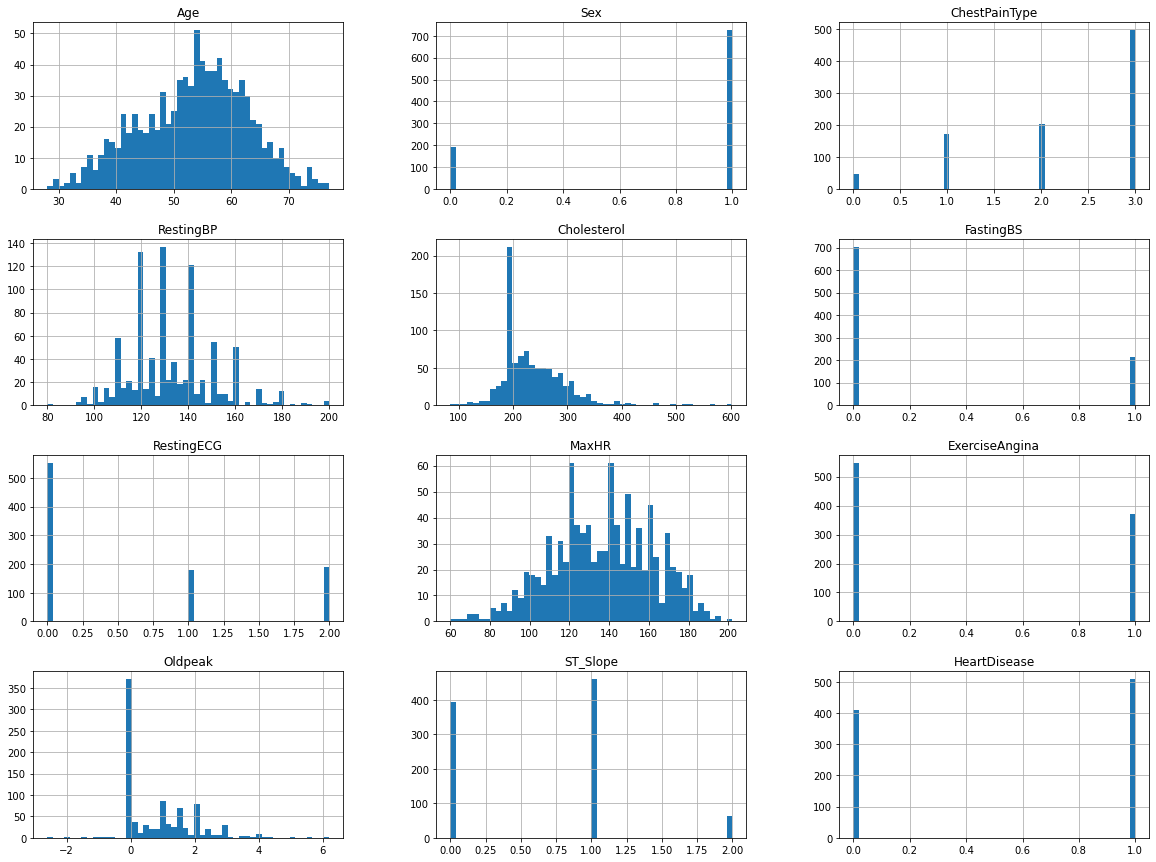

In [8]:
dt.hist(bins=50,figsize=(20,15))
print("Hist: ")

Matriz de cofusão: 


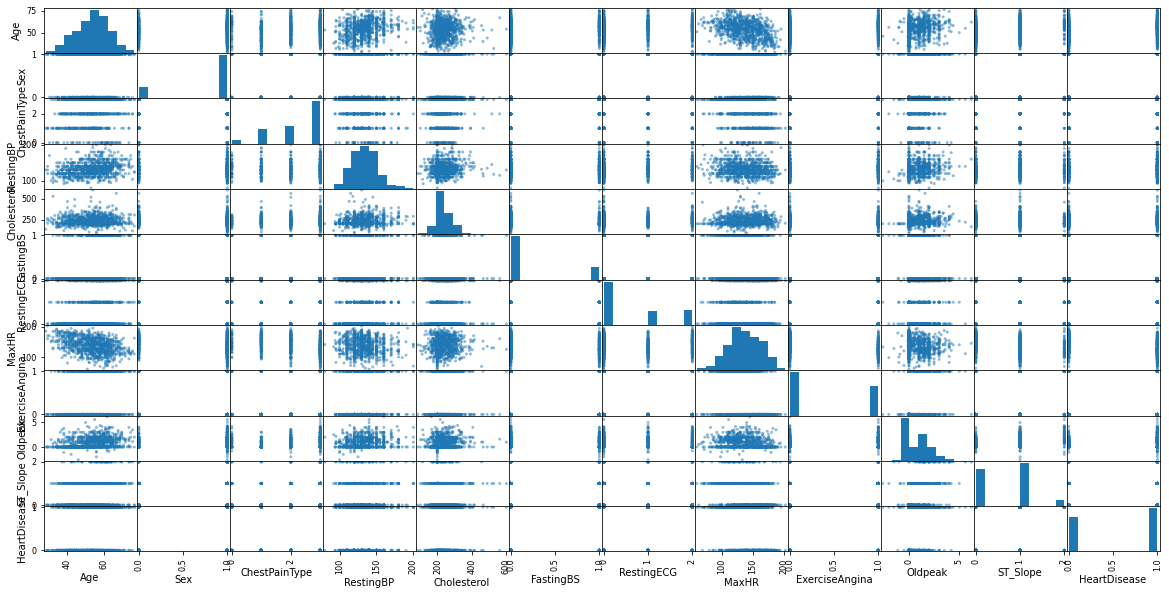

In [9]:
pd.plotting.scatter_matrix(dt, figsize=(20,10))
print('Matriz de cofusão: ')

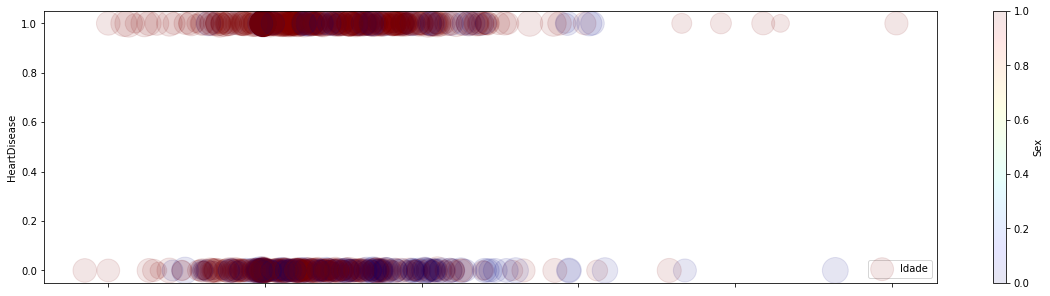

In [10]:
dt.plot(kind="scatter", y="HeartDisease", x="Cholesterol", alpha=0.1,s=dt["Age"]*10, label="Idade",c="Sex",cmap=plt.get_cmap("jet"), colorbar=True,figsize=(20,5))
plt.legend()

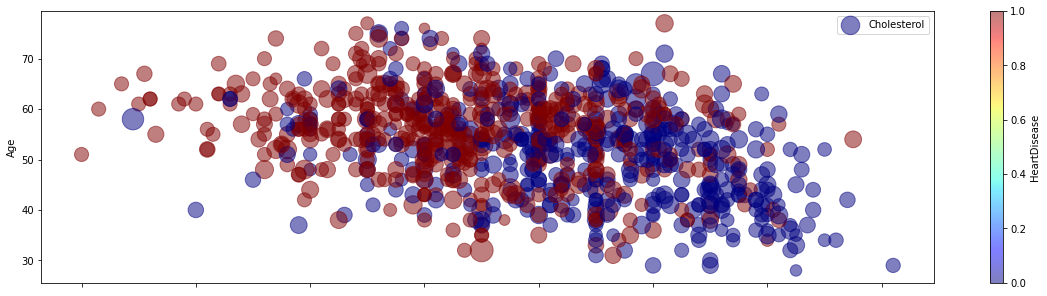

In [11]:
# como os dados são binários, é mais interessante tentar aplicar uma cor ao resultado
# o resultado abaixo ainda é influenciado pelo tamanho dos círculos

dt.plot(kind="scatter", x="MaxHR", y="Age", alpha=0.5, s='Cholesterol', label="Cholesterol",
c="HeartDisease",cmap=plt.get_cmap("jet"), colorbar=True, figsize=(20,5) )
plt.legend()

# Se você alterar o parâmetro "alpha", você altera a região que precisaria classificar
#

In [12]:
dt['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [13]:
dt.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,0.165896,0.263079,0.006397,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
Sex,0.055750,1.000000,0.168254,0.009421,-0.151270,0.120076,-0.018343,-0.189186,0.190664,0.105734,0.150693,0.305445
ChestPainType,0.165896,0.168254,1.000000,0.020645,0.007314,0.116703,0.031383,-0.343654,0.416625,0.245027,0.317480,0.471354
RestingBP,0.263079,0.009421,0.020645,1.000000,0.096524,0.067816,0.094498,-0.109669,0.153015,0.174215,0.082134,0.117930
Cholesterol,0.006397,-0.151270,0.007314,0.096524,1.000000,-0.061967,0.089840,0.072644,0.047294,0.059128,0.013094,-0.012340
FastingBS,0.198039,0.120076,0.116703,0.067816,-0.061967,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,-0.018343,0.031383,0.094498,0.089840,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,-0.189186,-0.343654,-0.109669,0.072644,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,0.416625,0.153015,0.047294,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,0.105734,0.245027,0.174215,0.059128,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


In [14]:
# vamos plotar a combinação das variáveis com maior correlação:
# 1- ST_Slope
# 2- ExerciseAngina
# 3- ChestPainType
# 4- Oldpeak ou MaxHR

# O banco de dados utilizados é muito pequeno para tentar treinar fetures de Sexo e Idade


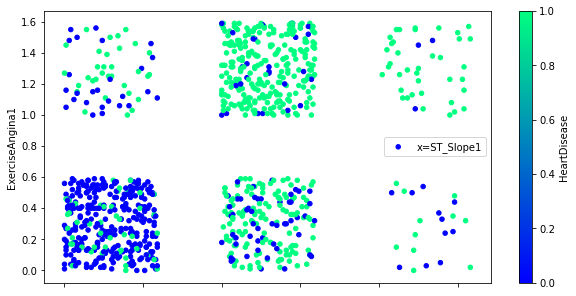

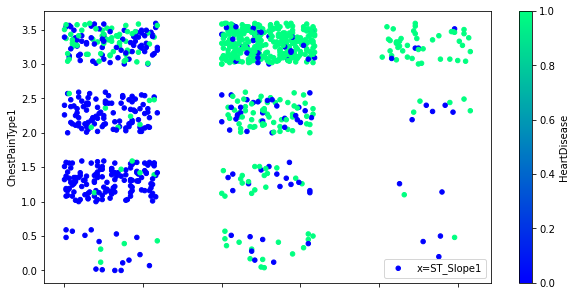

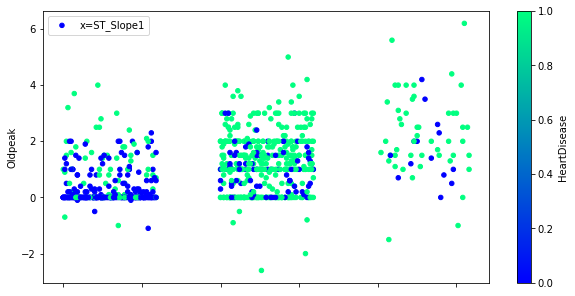

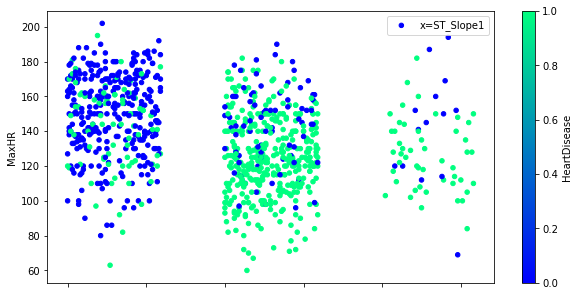

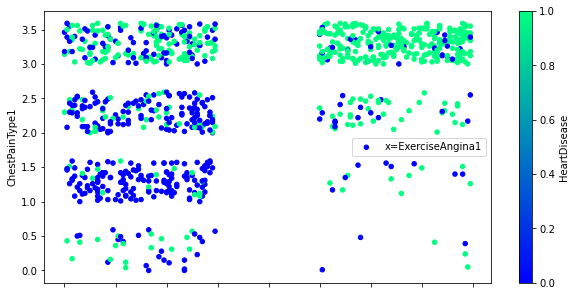

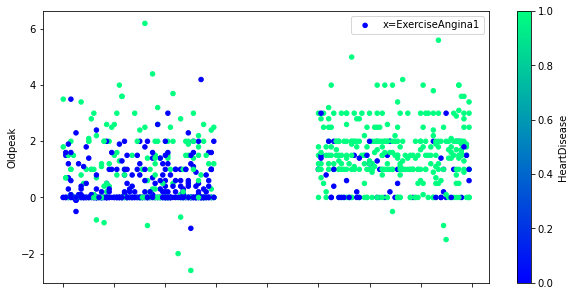

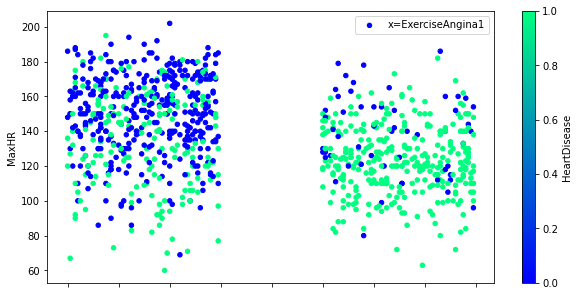

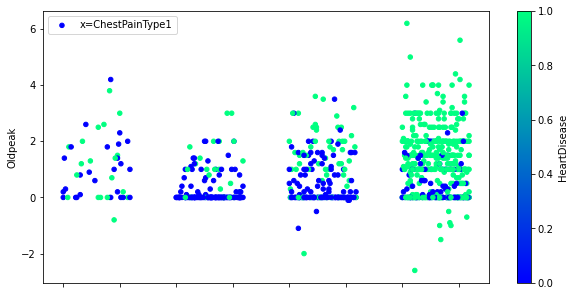

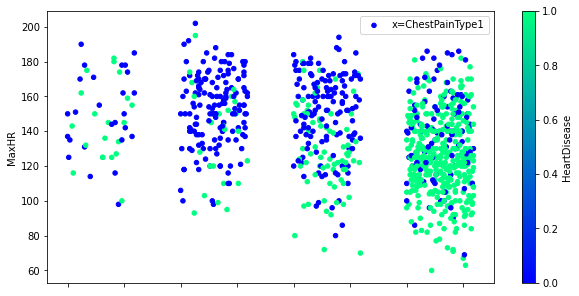

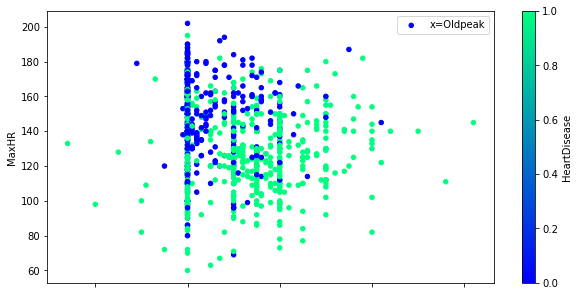

In [15]:
import random
aumento = 60
dt['ST_Slope1'] = dt['ST_Slope'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ExerciseAngina1'] = dt['ExerciseAngina'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ChestPainType1'] = dt['ChestPainType'].apply(lambda x : x+(random.randrange(0,aumento)/100))


# Gerar uma matriz de confusao:
All_col = ['ST_Slope1','ExerciseAngina1','ChestPainType1','Oldpeak','MaxHR']
col = []
for x in range(len(All_col)):
    for xx in range(x+1,len(All_col)):
        col.append( (All_col[x],All_col[xx]))
        

for c in col:
    dt.plot(kind='scatter', x=c[0], y = c[1], alpha=1,
        label='x='+c[0], title='',
        c='HeartDisease', cmap=plt.get_cmap("winter"),
        figsize=(10,5)
       )
    plt.legend()


Matriz de confusão: 


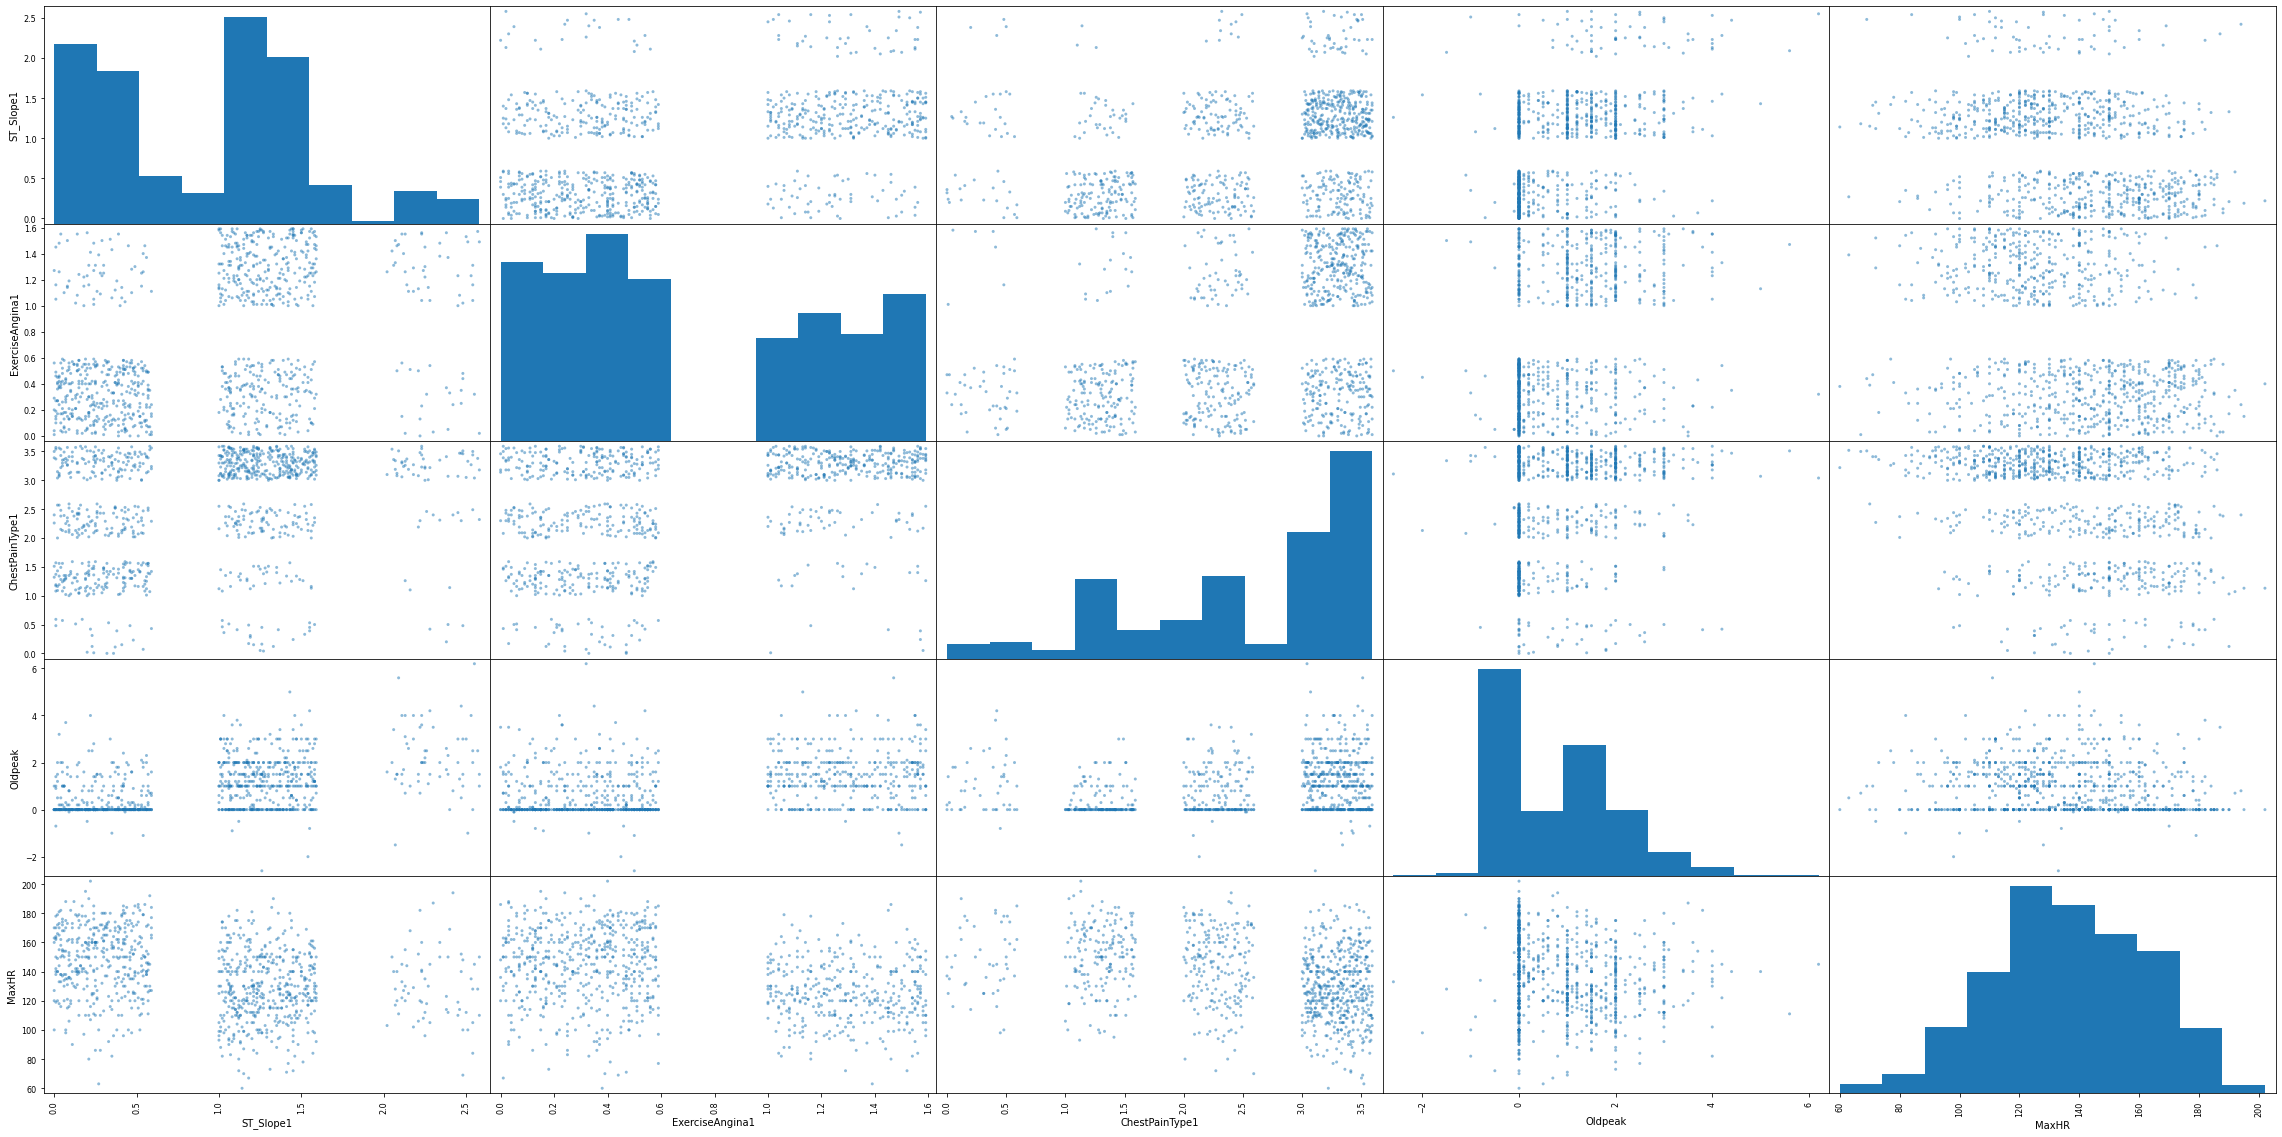

In [16]:
dbin = pd.DataFrame()

for i in All_col:
    dbin[i] = dt[i]

pd.plotting.scatter_matrix(dbin,figsize=(40,20))
print('Matriz de confusão: ')
#pd.plotting.scatter_matrix(dt, figsize=(20,10))
#pd.plotting.scatter_matrix(dt, figsize=(20,10))

In [17]:
"""dt.plot(kind="scatter", x="indices", y="ChestPainType", alpha=0.4,
# s=dt['Cholesterol'] , 
s = (dt['ExerciseAngina']*10)+1,
label=" ",        
c="HeartDisease",cmap=plt.get_cmap("jet"), colorbar=True,
figsize=(20,5)
)
plt.legend( )
"""

'dt.plot(kind="scatter", x="indices", y="ChestPainType", alpha=0.4,\n# s=dt[\'Cholesterol\'] , \ns = (dt[\'ExerciseAngina\']*10)+1,\nlabel=" ",        \nc="HeartDisease",cmap=plt.get_cmap("jet"), colorbar=True,\nfigsize=(20,5)\n)\nplt.legend( )\n'

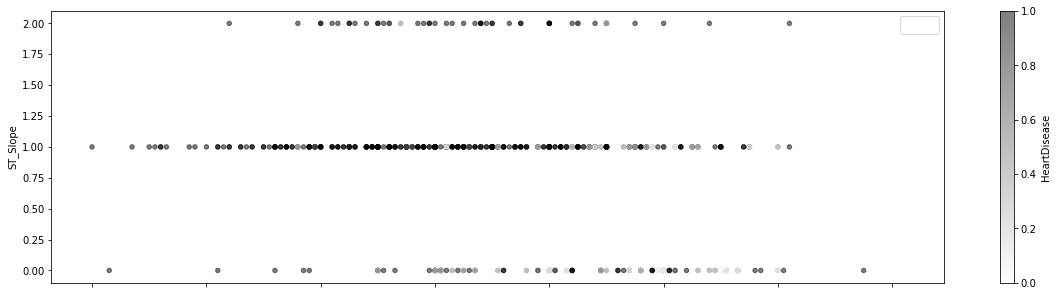

In [18]:
dt.plot(kind="scatter", x="MaxHR", y="ST_Slope", alpha=0.5,
# s=dt['Cholesterol'] , 
# s = (dt['ExerciseAngina']*10)+1,

label=" ",        
c="HeartDisease",cmap=plt.get_cmap("binary"), colorbar=True,
figsize=(20,5)
)
plt.legend( )

In [19]:
# me parece que temos varias variaveis binárias
## como cada uma delas se relacionam com a chance de ter doença cardíaca?
# vamos testar os fields com a maior correlação:
# ST_Slope
# ExerciseAngina
# ChestPainType
# Como fazemos isso?
# Como comparar dois valores binarios?




In [20]:
# dt.describe()

In [21]:
# dt.plot(kind='scatter', x='ExerciseAngina', y = 'ST_Slope', alpha=0.2,label="indices", c='HeartDisease', cmap=plt.get_cmap("jet"),figsize=(10,10))

In [22]:
import random
aumento = 80
dt['ST_Slope1'] = dt['ST_Slope'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ExerciseAngina1'] = dt['ExerciseAngina'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ChestPainType1'] = dt['ChestPainType'].apply(lambda x : x+(random.randrange(0,aumento)/100))
 




<AxesSubplot:title={'center':'test'}, xlabel='ExerciseAngina1', ylabel='ST_Slope1'>

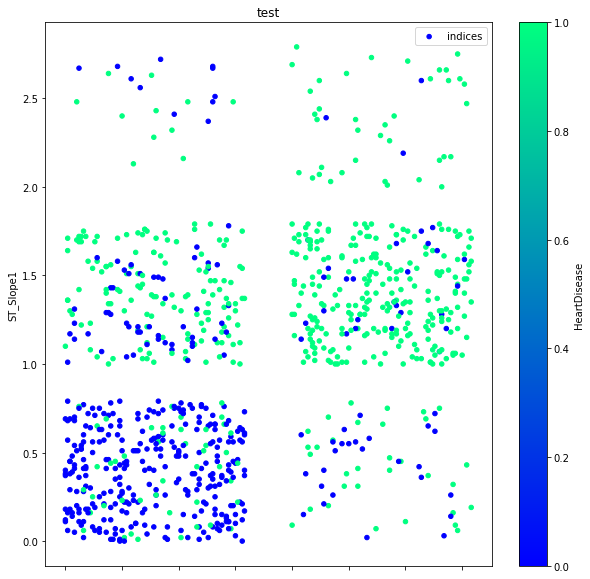

In [23]:
# Agora ficou visível uma relação, não?!
dt.plot(kind='scatter', x='ExerciseAngina1', y = 'ST_Slope1', alpha=1,
        label="indices", title='test',
        c='HeartDisease', cmap=plt.get_cmap("winter"),
        figsize=(10,10)
       )
 


In [24]:
# vamos tentar colocar mais uma variavel no jogo?
"""
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
"""

"\nfrom mpl_toolkits.mplot3d import Axes3D\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\n"

<AxesSubplot:title={'center':'test'}, xlabel="{'center': 'test', 'labelpad': 1}", ylabel='ST_Slope1'>

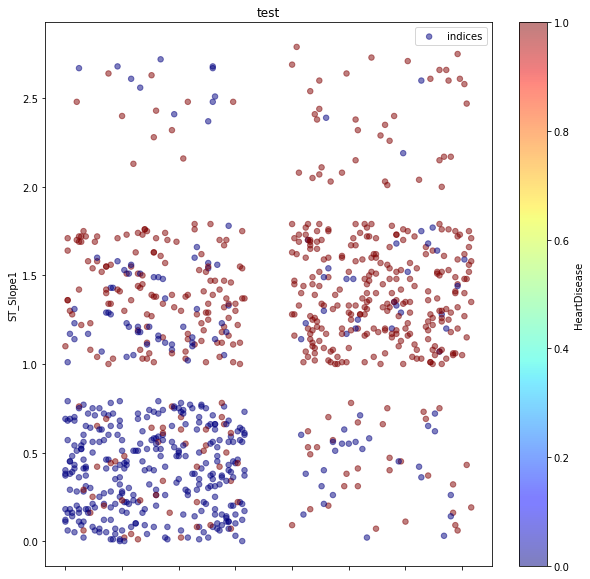

In [25]:
# Relação entre 

# style = 
dt.plot(kind='scatter', x='ExerciseAngina1', y = 'ST_Slope1', alpha=0.5,
        label="indices", title='test',
        c='HeartDisease', cmap=plt.get_cmap("jet"), s=30,
        figsize=(10,10),
        xlabel={'center':'test', 'labelpad':1}
       )
#print(dt.axes)


<AxesSubplot:xlabel='ExerciseAngina1', ylabel='ChestPainType1'>

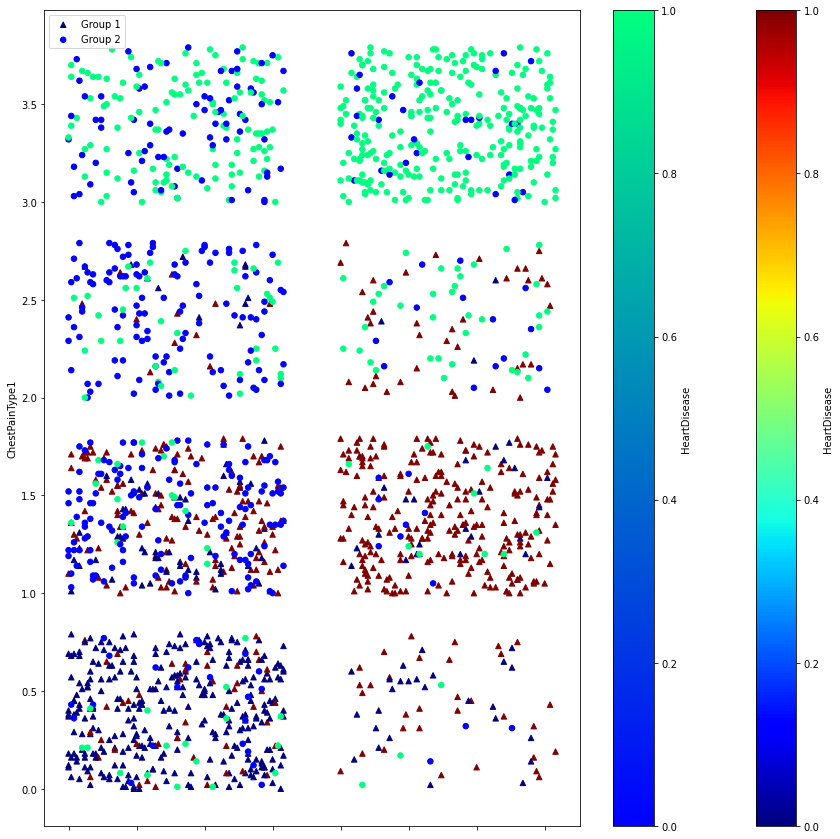

In [26]:
"""dt.plot(kind='scatter', x='ExerciseAngina1', y = 'ChestPainType', alpha=0.5,
        label="indices", title='test',
        c='HeartDisease', cmap=plt.get_cmap("jet"), marker='^',
        figsize=(10,10)
       )
plt.xlabel("Culmen Length (mm)",fontweight ='bold', size=14)    
"""

"""
ST_Slope
ExerciseAngina
ChestPainType
Oldpeak
"""

ax = dt.plot.scatter(x='ExerciseAngina1', y = 'ST_Slope1' , label="Group 1", c='HeartDisease', cmap=plt.get_cmap("jet"), marker='^', s=30)



dt.plot.scatter(x='ExerciseAngina1', y = 'ChestPainType1', label="Group 2",  c='HeartDisease', 
                cmap=plt.get_cmap("winter"), ax=ax,figsize=(15,15),s=30)




<AxesSubplot:title={'center':'test'}, xlabel='ExerciseAngina1', ylabel='ST_Slope1'>

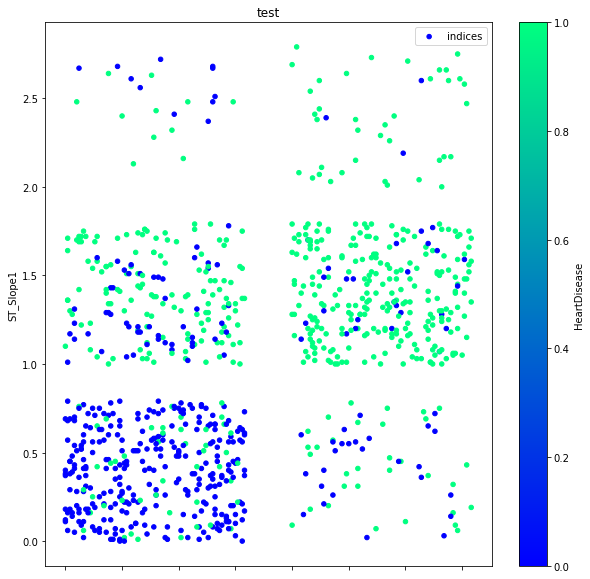

In [27]:

dt.plot(kind='scatter', x='ExerciseAngina1', y = 'ST_Slope1', alpha=1,
        label="indices", title='test',
        c='HeartDisease', cmap=plt.get_cmap("winter"),
        figsize=(10,10)
       )
 

In [28]:
# Por que NÃO foi considerado o sexo do indivíduo?
# O problema de considerar o sexo é que os dados são experimentais, portanto, 
# a relação do banco de dados pode ser tendenciosa e não necessáriamente refletir o que acontece na natureaza

In [29]:
# Vamos investigar as variáveis que possuem maior correlação:


In [30]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,  y_treino,y_teste, = train_test_split(dbin,dt['HeartDisease'],test_size= 0.2)

from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(x_treino,y_treino)

print('Accuracy: ',modelo.score(x_teste,y_teste))



Accuracy:  0.7989130434782609


In [31]:
print(x_treino)
print(y_treino)

     ST_Slope1  ExerciseAngina1  ChestPainType1  Oldpeak  MaxHR
903       0.15             0.14            1.05      0.0    163
597       0.09             0.40            2.59      0.2    136
99        0.16             0.13            1.14      0.0    144
817       1.55             1.15            3.32      2.8    141
879       2.16             0.51            1.10      1.0    168
..         ...              ...             ...      ...    ...
178       0.42             0.12            2.14      0.0    150
816       0.31             0.58            3.18      0.0    171
153       0.49             0.41            3.49      0.0    140
643       1.05             0.19            2.21      2.5    165
109       0.09             0.53            1.00      0.0    106

[734 rows x 5 columns]
903    0
597    0
99     0
817    1
879    1
      ..
178    0
816    1
153    0
643    1
109    0
Name: HeartDisease, Length: 734, dtype: int64


Relação de pessoas que tiveram insuficiência cardíaca: 0.5533769063180828
É uma relação equilibrada, portanto a chance de ser enviasada é baixa


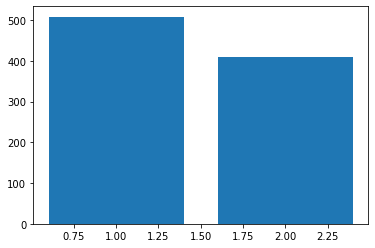

In [32]:
"""
    Finalizar a preparação dos dados para iniciar a rede neural
"""


# proporação de pessoas com insuficiência no banco de dados
resultados_len = len(dt[dt.HeartDisease == 1]), len(dt[dt.HeartDisease == 0])
print("Relação de pessoas que tiveram insuficiência cardíaca:", resultados_len[0]/ (resultados_len[1]+resultados_len[0]))
print("É uma relação equilibrada, portanto a chance de ser enviasada é baixa")
fig, ax = plt.subplots()
ax.bar([1,2], resultados_len)
plt.show()

In [33]:
"""
db = pd.DataFrame()
db["ST_Slope"] = dt["ST_Slope"]
db["ExerciseAngina"] = dt["ExerciseAngina"]
#db["ChestPainType"] = dt["ChestPainType"]
for dor_tipo in ["TA","ATA","NAP","ASY"]:
    db["ChestPainType_"+dor_tipo] = dt["ChestPainType"].apply(lambda x: 1 if dor_tipo == x else 0)
db["MaxHR"] = dt["MaxHR"].apply(lambda x: (x-60) /(202-60))
db["Oldpeak"] = dt["Oldpeak"]
db["HeartDisease"] = dt["HeartDisease"]
db.head()
# 1- ST_Slope
# 2- ExerciseAngina
# 3- ChestPainType
# 4- Oldpeak ou MaxHR

#db.Oldpeak.describe()
db.MaxHR.describe()
db.head(20)
# db['ChestPainType'].hea

# dt["RestingBP"] = dt["RestingBP"].apply(lambda x: dt["RestingBP"].mean() if x == 0 else x)
"""

'\ndb = pd.DataFrame()\ndb["ST_Slope"] = dt["ST_Slope"]\ndb["ExerciseAngina"] = dt["ExerciseAngina"]\n#db["ChestPainType"] = dt["ChestPainType"]\nfor dor_tipo in ["TA","ATA","NAP","ASY"]:\n    db["ChestPainType_"+dor_tipo] = dt["ChestPainType"].apply(lambda x: 1 if dor_tipo == x else 0)\ndb["MaxHR"] = dt["MaxHR"].apply(lambda x: (x-60) /(202-60))\ndb["Oldpeak"] = dt["Oldpeak"]\ndb["HeartDisease"] = dt["HeartDisease"]\ndb.head()\n# 1- ST_Slope\n# 2- ExerciseAngina\n# 3- ChestPainType\n# 4- Oldpeak ou MaxHR\n\n#db.Oldpeak.describe()\ndb.MaxHR.describe()\ndb.head(20)\n# db[\'ChestPainType\'].hea\n\n# dt["RestingBP"] = dt["RestingBP"].apply(lambda x: dt["RestingBP"].mean() if x == 0 else x)\n'

In [47]:
"""
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(x_treino,y_treino)

print('Accuracy: ',modelo.score(x_teste,y_teste))

"""
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(db, train_size=0.8)


x_treino,x_teste,y_treino,y_teste = train_test_split(db,dt['HeartDisease'],test_size= 0.2)
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(x_treino,y_treino)

print('Accuracy: ',modelo.score(x_teste,y_teste))


Accuracy:  0.8586956521739131
     ExerciseAngina  ChestPainType  ST_Slope
35                0            0.1       0.0
838               1            0.3       0.0
273               0            0.2       0.0
324               0            0.3       0.1
175               1            0.3       0.1
..              ...            ...       ...
147               0            0.1       0.0
429               1            0.2       0.1
389               0            0.3       0.1
132               1            0.3       0.1
804               1            0.2       0.1

[184 rows x 3 columns]


In [36]:
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(x_treino,y_treino)

print('Accuracy: ',modelo.score(x_teste,y_teste))

Accuracy:  0.8804347826086957


In [37]:
""" 
    TESTANDO COM PERCEPTRON
"""
from sklearn.linear_model import Perceptron
from sklearn import metrics

In [38]:
model = Perceptron()
model.fit(x_treino,y_treino)
y_pred = model.predict(x_teste)
metrics.accuracy_score(y_teste,y_pred)

0.8206521739130435

In [216]:
x_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 525 to 662
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ExerciseAngina  734 non-null    int64  
 1   ChestPainType   734 non-null    float64
 2   Oldpeak         734 non-null    float64
 3   ST_Slope        734 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.7 KB


In [48]:
"""
    Tensorflow
"""
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [49]:
number_epochs = 100
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [50]:
# Define Sequential model with 3 layers
model = tf.keras.Sequential(
    [
        layers.Dense(10, activation="sigmoid", name="Camada de Entrada"),
      #  layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(1, name="Camada de Saída"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
 
#y = model(x)


2022-07-17 13:23:57.090188: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-17 13:23:57.094862: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [51]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,  y_treino,y_teste = train_test_split(db,dt['HeartDisease'],test_size= 0.2)

In [52]:
x_treino.shape[1]

3

In [53]:
activacoes = ['relu','softmax','gelu','sigmoid','softplus','softsign','tanh','silu']
loss_types = ['KLD','MAE','MAPE','MSE','MSLE','binary_crossentropy','binary_focal_crossentropy','categorical_hinge',
            'cosine_similarity','deserialize','get','hinge','huber','kl_divergence','kld','kullback_leibler_divergence',
              'log_cosh','logcosh','mae','mape','mean_absolute_error','mean_absolute_percentage_error','mean_squared_error',
              'mean_squared_logarithmic_error','mse','msle','poisson','serialize','sparse_categorical_crossentropy',
              'squared_hinge']
resultado =[]
#for loss_type in loss_types:
loss_type = 'binary_crossentropy'

In [54]:
x_treino,x_teste,y_treino,y_teste = train_test_split(db,dt['HeartDisease'],test_size= 0.2)

In [55]:
import numpy as np
max_seed = 198
initializer = tf.keras.initializers.HeNormal()



optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.01)

optimizer_SGD = tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    name='SGD')


optimizer_Adagrad= tf.keras.optimizers.Adagrad(
    learning_rate=0.000000001,
    initial_accumulator_value=0.01,
    epsilon=1e-07,
    name="Adagrad",
 
)


loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model = tf.keras.models.Sequential([

              tf.keras.layers.Dense(x_treino.shape[1], activation='relu', input_shape=(x_treino.shape[1],), kernel_initializer=initializer),
              tf.keras.layers.Dense(5, activation='sigmoid'),
              tf.keras.layers.Dense(1, activation='sigmoid'),
              tf.keras.layers.Dense(1, activation='ThresholdedReLU') 
            ])

model.compile(optimizer=optimizer_Adagrad,
                          loss='binary_crossentropy',
                          #loss='mean_squared_error',
                          metrics=['accuracy'])

#model.summary()
model.fit(x_treino, y_treino, epochs=10, steps_per_epoch=3,    batch_size=256)
#print(  model.evaluate(x_teste,  y_teste, verbose=1)[1] )
    
print("Teste accuracy:", model.evaluate(x_teste,  y_teste, verbose=0)[1])
print("Treino accuracy:", model.evaluate(x_treino,  y_treino, verbose=2)[1])

Epoch 1/10
3/3 [==============================] - 1s 38ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 2/10
3/3 [==============================] - 0s 33ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 3/10
3/3 [==============================] - 0s 34ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 6/10
3/3 [==============================] - 0s 8ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 10/10
3/3 [==============================] - 0s 7ms/step - loss: 8.6161 - accuracy: 0.4414
Teste accuracy: 0.46739131212234497

In [56]:
model.fit(x_treino, y_treino, epochs=10)

model.evaluate(x_teste,  y_teste, verbose=2, batch_size=32)

Epoch 1/10
23/23 [==============================] - 0s 10ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 2/10
23/23 [==============================] - 0s 9ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 3/10
23/23 [==============================] - 0s 8ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 4/10
23/23 [==============================] - 0s 8ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 5/10
23/23 [==============================] - 0s 9ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 6/10
23/23 [==============================] - 0s 6ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 7/10
23/23 [==============================] - 0s 9ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 8/10
23/23 [==============================] - 0s 9ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 9/10
23/23 [==============================] - 0s 7ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 10/10
23/23 [==============================] - 0s 7ms/step - loss: 8.6161 - accuracy: 0.4414
6/6 - 0s - loss: 8

[8.215461730957031, 0.46739131212234497]

In [57]:
def plot_hist_and_predictions(history, x, y, model, s=15, cmap='bwr'):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'])
    plt.xlabel('epochs')
    plt.ylabel('accuracy')

    ax = plt.subplot(1, 2, 2)
    plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=s, cmap=cmap)

    plt.subplot(1, 2, 2, sharex=ax, sharey=ax)
    x1, x2, x_mesh = __compute_meshgrid(x, y)
    y_mesh = model.predict_classes(x_mesh)
    plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=s, cmap=cmap)
    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap=cmap, alpha=0.5)

In [58]:
loss_types = ['KLD','MAE','MAPE','MSE','MSLE','binary_crossentropy','binary_focal_crossentropy','categorical_crossentropy','categorical_hinge','cosine_similarity','deserialize','get','hinge','huber','kl_divergence','kld','kullback_leibler_divergence','log_cosh','logcosh','mae','mape','mean_absolute_error','mean_absolute_percentage_error','mean_squared_error','mean_squared_logarithmic_error','mse','msle','poisson','serialize','sparse_categorical_crossentropy','squared_hinge']

In [59]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu,input_shape=(x_treino.shape[1],)))
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu ))
model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid ))
model.summary()
model.compile(optimizer='adam',
            loss='binary_crossentropy',
             metrics=['accuracy'])
hist = model.fit(x_teste,y_teste,batch_size=32, epochs=100,verbose=1)
#plot_hist_and_predictions(hist.history(x_teste,y_teste,model))
model.evaluate(x_teste,  y_teste, verbose=1) 

          

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               400       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
6/6 [==============================] - 1s 23ms/step - loss: 0.6797 - accuracy: 0.4946
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6514 - accuracy: 0.5326
Epoch 3/100
6/6 [==============================] - 0s 29ms/step - loss: 0.6298 - accuracy: 0.6250
Epoch 4/100
6/6 [====

6/6 [==============================] - 0s 30ms/step - loss: 0.3718 - accuracy: 0.8478
Epoch 76/100
6/6 [==============================] - 0s 24ms/step - loss: 0.3732 - accuracy: 0.8478
Epoch 77/100
6/6 [==============================] - 0s 12ms/step - loss: 0.3716 - accuracy: 0.8478
Epoch 78/100
6/6 [==============================] - 0s 16ms/step - loss: 0.3714 - accuracy: 0.8478
Epoch 79/100
6/6 [==============================] - 0s 17ms/step - loss: 0.3710 - accuracy: 0.8478
Epoch 80/100
6/6 [==============================] - 0s 16ms/step - loss: 0.3718 - accuracy: 0.8478
Epoch 81/100
6/6 [==============================] - 0s 13ms/step - loss: 0.3711 - accuracy: 0.8478
Epoch 82/100
6/6 [==============================] - 0s 18ms/step - loss: 0.3695 - accuracy: 0.8478
Epoch 83/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3695 - accuracy: 0.8478
Epoch 84/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3691 - accuracy: 0.8478
Epoch 85/100
6/6 [======

[0.3629973828792572, 0.85326087474823]

In [60]:
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.01)

optimizer_SGD = tf.keras.optimizers.SGD(
    learning_rate=0.001,
    momentum=0.1,
    nesterov=False,
    name='SGD')


optimizer_Adagrad= tf.keras.optimizers.Adagrad(
    learning_rate=0.01,
    initial_accumulator_value=0.01,
    epsilon=1e-07,
    name="Adagrad",
 
)

In [61]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu,input_shape=(x_treino.shape[1],)))
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu ))
model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid ))
model.summary()
model.compile(optimizer=optimizer_adam,
            loss='binary_crossentropy',
             metrics=['accuracy'])
hist = model.fit(x_teste,y_teste,batch_size=32, epochs=100,verbose=0)
model.evaluate(x_teste,  y_teste, verbose=1) 


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               400       
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 0s 13ms/step - loss: 0.3361 - accuracy: 0.8533


[0.3361494839191437, 0.85326087474823]

In [210]:
import hashlib

########################################
####     Vamos dividir os dados    #####
########################################
"""
  => aqui vamos utilizar uma aborgem com hash, 
  => vamos criar um índice
  => gerar o hash desse índice e utilizar o útlimo hexadecimal como aleatoridade
  *** obs como é um hexadeciamal, pode variar entre 0 - 255
"""
def GetHash(value):# gera um hash e retorna o último hexadecimal
     return hashlib.md5(np.int64(value)).digest()[-1]

def split_database( data_base, ratios, y):
    # cria e preenche uma coluna com o valor do último hex do hash ( gerado a partir do indice)
    c_split = pd.Series([GetHash(indice) for indice in range(len(db))])
    
    for indice, ratio in enumerate(ratios):
        # cria uma marcação para cada faixa de ratio
        c_split = c_split.apply( lambda x: 256+indice if x < 256*ratio else x)
        # retorna os dados marcados
        yield data_base[ c_split == 256+indice ].drop(collums=[y])
        yield data_base[ c_split == 256+indice ][y]
        
    # retorna o restante dos dados
    yield data_base[ c_split < 256].drop(collums=[y])
    yield data_base[ c_split < 256][y]
        
    
x_db_verify,y_db_verify,  x_db_test,y_db_test,   x_db_train,y_db_train= split_database(db,[0.1,0.25],'HeartDisease')

db_verify.count()

TypeError: DataFrame.drop() got an unexpected keyword argument 'collums'

existe
existe
existe
existe
existe
existe
[8, 12, 8, 4, 13, 8, 4, 8, 1, 11, 7, 12, 13, 9, 15, 9, 10, 13, 5, 5, 13, 7, 11, 16, 7, 8, 6, 14, 6, 15, 13, 6, 15, 9, 8, 2, 10, 6, 13, 7, 9, 11, 8, 11, 10, 16, 11, 9, 15, 6, 8, 11, 11, 12, 10, 17, 6, 4, 13, 18, 11, 8, 9, 11, 20, 8, 8, 11, 14, 11, 13, 14, 5, 9, 11, 11, 8, 9, 5, 13, 11, 8, 10, 12, 10, 8, 16, 7, 12, 9, 11, 12, 5, 13, 10, 10, 14, 5, 11, 9, 5]


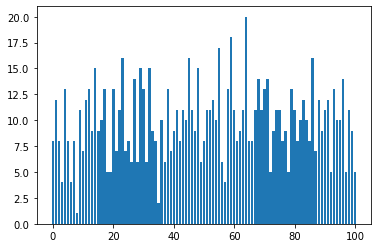

In [115]:

    
valores = [0 for i in range(101)]

for i in range(1000):
    valores[ int(round(GetHash(i) / 2.56,0)) ] +=1;
    if GetHash(i) == 0:
        print("existe")
print(valores)
fig, ax = plt.subplots()
ax.bar([i for i in range(len(valores))], valores, )
plt.show()


In [85]:
db.head()

,ExerciseAngina,ChestPainType,ST_Slope,index
0,0,0.1,0.0,0
1,0,0.2,0.1,1
2,0,0.1,0.0,2
3,1,0.3,0.1,3
4,0,0.2,0.0,4


In [107]:
b = 10.3
int(round(b))

10

In [166]:
db.head()

,ExerciseAngina,ChestPainType,ST_Slope
0,0,0.1,0.0
1,0,0.2,0.1
2,0,0.1,0.0
3,1,0.3,0.1
4,0,0.2,0.0


In [149]:
db.loc(['False'],['index'])

TypeError: _LocationIndexer.__call__() takes from 1 to 2 positional arguments but 3 were given